In [3]:
import os

In [4]:
len(os.listdir('data/cloudy'))

1500

In [5]:
len(os.listdir('data/desert'))

1131

In [6]:
len(os.listdir('data/green_area'))

1500

In [7]:
len(os.listdir('data/water'))

1500

In [40]:
import cv2
import numpy as np

In [37]:
import matplotlib.pyplot as plt

In [43]:
urls = os.listdir('data/cloudy')

In [46]:
path = "data/cloudy/"+urls[0]

In [47]:
path

'data/cloudy/train_10021.jpg'

In [48]:
def loadImages(path,urls,target):
    images=[]
    labels=[]
    for i in range(len(urls)):
        img_path = path +"/"+urls[i]
        img = cv2.imread(img_path)
        img = img/255.0
        img = cv2.resize(img,(100,100))
        images.append(img)
        labels.append(target)
    return images,labels

In [49]:
cloudy_path = "data/cloudy"
cloud_url = os.listdir(cloudy_path)
cloud_img , cloud_target = loadImages(cloudy_path,cloud_url,0)

In [50]:
len(cloud_url),len(cloud_img)

(1500, 1500)

In [53]:
desert_path = "data/desert"
desert_url = os.listdir(desert_path)
desert_img , desert_target = loadImages(desert_path,desert_url,1)

In [54]:
len(desert_url),len(desert_img)

(1131, 1131)

In [55]:
green_area_path = "data/green_area"
green_area_url = os.listdir(green_area_path)
green_area_img , green_area_target = loadImages(green_area_path,green_area_url,2)

In [56]:
len(green_area_url),len(green_area_img)

(1500, 1500)

In [57]:
water_path = "data/cloudy"
water_url = os.listdir(water_path)
water_img , water_target = loadImages(water_path,water_url,3)

In [58]:
len(water_url),len(water_img)

(1500, 1500)

In [59]:
import numpy as np

In [60]:
data = np.r_[cloud_img,desert_img,green_area_img,water_img]

In [61]:
data.shape

(5631, 100, 100, 3)

In [62]:
targets = np.r_[cloud_target,desert_target,green_area_target,water_target]

In [63]:
targets.shape

(5631,)

In [64]:
from sklearn.model_selection import train_test_split

x_train ,x_test,y_train,y_test = train_test_split(data,targets,test_size=0.25)

In [65]:
import tensorflow as tf

In [66]:
from tensorflow import keras

In [67]:
from tensorflow.keras import layers,models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Flatten,Dense

In [73]:
model = Sequential([
    Conv2D(32,(3,3),input_shape=(100,100,3),activation='relu'),
    MaxPooling2D(),
    Conv2D(32,3,activation='relu'),
    MaxPooling2D(),
    Conv2D(16,3,activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512,activation='relu'),
    Dense(256,activation='relu'),
    Dense(4,activation='softmax')
])

In [74]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 49, 49, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 47, 47, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 21, 21, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 10, 10, 16)      

In [81]:
model.compile(optimizer='adam',loss= tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [82]:
model.fit(x_train,y_train,batch_size=32,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
132/132 [==============================] - 19s 143ms/step - loss: 0.5137 - accuracy: 0.6867 - val_loss: 0.4697 - val_accuracy: 0.7088
Epoch 2/10
132/132 [==============================] - 18s 136ms/step - loss: 0.5094 - accuracy: 0.6969 - val_loss: 0.4867 - val_accuracy: 0.7116
Epoch 3/10
132/132 [==============================] - 16s 124ms/step - loss: 0.5008 - accuracy: 0.6903 - val_loss: 0.4872 - val_accuracy: 0.7038
Epoch 4/10
132/132 [==============================] - 19s 140ms/step - loss: 0.4859 - accuracy: 0.6924 - val_loss: 0.4757 - val_accuracy: 0.7159
Epoch 5/10
132/132 [==============================] - 17s 127ms/step - loss: 0.5063 - accuracy: 0.6825 - val_loss: 0.4700 - val_accuracy: 0.7095
Epoch 6/10
132/132 [==============================] - 17s 129ms/step - loss: 0.4961 - accuracy: 0.6912 - val_loss: 0.4677 - val_accuracy: 0.7166
Epoch 7/10
132/132 [==============================] - 17s 130ms/step - loss: 0.4837 - accuracy: 0.6997 - val_loss: 0.4784 - val_ac

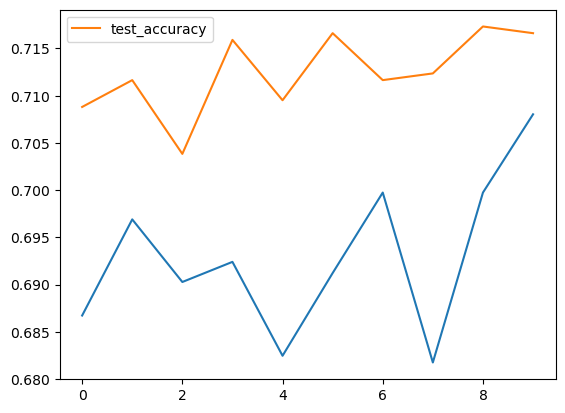

In [83]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'],label='test_accuracy')
plt.legend()
plt.show()

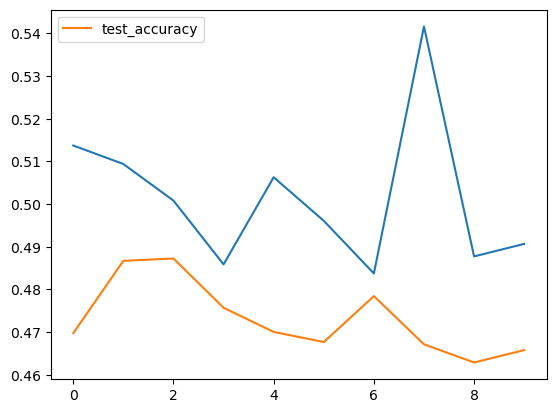

In [84]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'],label='test_accuracy')
plt.legend()
plt.show()

In [124]:
yp = model.predict(x_test)
yp[:10]

44/44 [==============================] - 2s 33ms/step


array([[3.6168739e-03, 4.7799307e-09, 9.9603337e-01, 3.4963773e-04],
       [5.0176722e-01, 3.7734460e-03, 1.3077856e-04, 4.9432859e-01],
       [4.5457169e-01, 9.4286047e-02, 1.0672716e-03, 4.5007497e-01],
       [5.0101113e-01, 3.5257190e-03, 1.7632110e-04, 4.9528679e-01],
       [1.0007449e-03, 8.3402979e-11, 9.9894136e-01, 5.7927977e-05],
       [9.3116425e-02, 8.1699467e-01, 2.2045527e-11, 8.9888871e-02],
       [5.0510025e-01, 7.2053424e-03, 3.4592387e-05, 4.8765981e-01],
       [5.0219882e-01, 4.6908502e-03, 1.0151923e-04, 4.9300885e-01],
       [5.0086635e-01, 2.6680408e-03, 3.9506689e-04, 4.9607044e-01],
       [2.3586868e-01, 5.2796644e-01, 8.8048455e-06, 2.3615608e-01]],
      dtype=float32)

In [107]:
y_test

array([2, 0, 0, ..., 0, 0, 1])

In [108]:
from tensorflow.keras.utils import plot_model

In [109]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [110]:
model.evaluate(x_test,y_test)

44/44 [==============================] - 1s 25ms/step - loss: 0.4658 - accuracy: 0.7166


[0.46576347947120667, 0.7166193127632141]

In [115]:
y_test[:10]

array([2, 0, 0, 0, 2, 1, 3, 0, 3, 3])

In [117]:
y_pred =[]
for element in yp:
    if element >= 0.0:
        y_pred.append(0)
    elif element>0.5:
        y_pred.append(1)
    elif element>1.5:
        y_pred.append(2)
    else :
        y_pred.append(3)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()